# Econometrics seminar № 4

In [1]:
import numpy as np # библиотека для работы со статистическиим данными
import matplotlib.pyplot as plt # библиотека для отображения графиков


import statsmodels.formula.api as smf # для построения регрессий
import wooldridge # для работы с датасетами

from scipy import stats as st # для работы с статистическими таблицами

In [2]:
wooldridge.data()

  J.M. Wooldridge (2019) Introductory Econometrics: A Modern Approach,
  Cengage Learning, 6th edition.

  401k       401ksubs    admnrev       affairs     airfare
  alcohol    apple       approval      athlet1     athlet2
  attend     audit       barium        beauty      benefits
  beveridge  big9salary  bwght         bwght2      campus
  card       catholic    cement        census2000  ceosal1
  ceosal2    charity     consump       corn        countymurders
  cps78_85   cps91       crime1        crime2      crime3
  crime4     discrim     driving       earns       econmath
  elem94_95  engin       expendshares  ezanders    ezunem
  fair       fertil1     fertil2       fertil3     fish
  fringe     gpa1        gpa2          gpa3        happiness
  hprice1    hprice2     hprice3       hseinv      htv
  infmrt     injury      intdef        intqrt      inven
  jtrain     jtrain2     jtrain3       kielmc      lawsch85
  loanapp    lowbrth     mathpnl       meap00_01   meap01
  meap93    

## С1

Use the data in WAGE1.RAW for this exercise.
   1. [Estimate](#estimate) the equation $$ wage = \beta_0 + \beta_1 * educ + \beta_2*exper + \beta*tenure + u.$$ Save the residuals and plot a histogram.
   2. [Repeat](#variable) part (i), but with log(wage) as the dependent variable.
   3. Would you say that Assumption MLR.6 is closer to being satisfied for the level-level model or the log-level model?

<p id="estimate"><b>1.A</b></p>
Estimate the equation $$ wage = \beta_0 + \beta_1 * educ + \beta_2*exper + \beta*tenure + u.$$ Save the residuals and plot a histogram.

In [5]:
df = wooldridge.data('wage1')
df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [73]:
wooldridge.data('wage1',description=True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [6]:
model = smf.ols(formula = "wage~educ+exper + tenure", data = df)

In [7]:
res = model.fit()

In [11]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     76.87
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           3.41e-41
Time:                        14:30:31   Log-Likelihood:                -1336.8
No. Observations:                 526   AIC:                             2682.
Df Residuals:                     522   BIC:                             2699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8727      0.729     -3.941      0.0

In [35]:
# array of residuals is
level_residual = res.resid

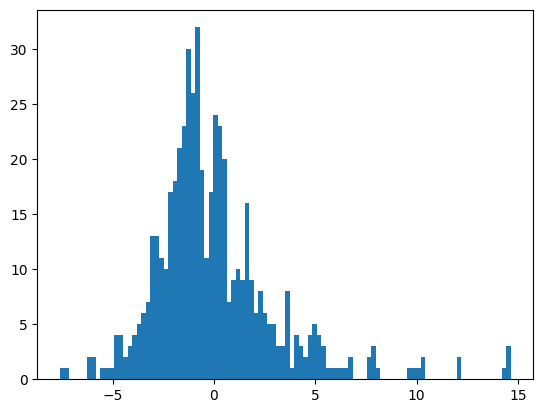

In [36]:
#plot histogram
plt.hist(level_residual,bins=100)
plt.show()

<p id="variable"><b>1.B</b></p>



Repeat <p  id="estimate">part(i)</p> , but with log(wage) as the dependent variable.

In [29]:
log_model = smf.ols(formula='np.log(wage)~educ + exper + tenure', data = df)

In [30]:
log_res = log_model.fit()

In [31]:
print(log_res.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     80.39
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           9.13e-43
Time:                        14:58:55   Log-Likelihood:                -313.55
No. Observations:                 526   AIC:                             635.1
Df Residuals:                     522   BIC:                             652.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2844      0.104      2.729      0.0

In [38]:
# residuals of the new model is 
log_residuals = log_res.resid

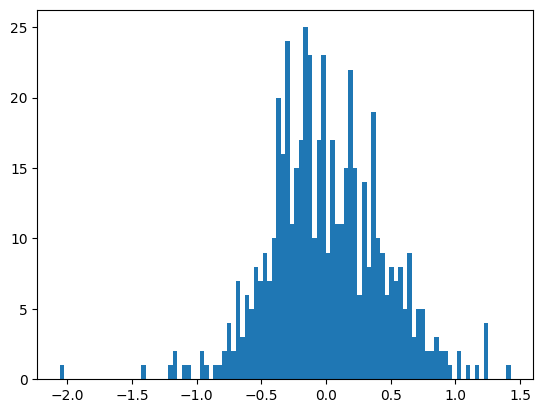

In [40]:
plt.hist(log_residuals, bins=100)
plt.show()

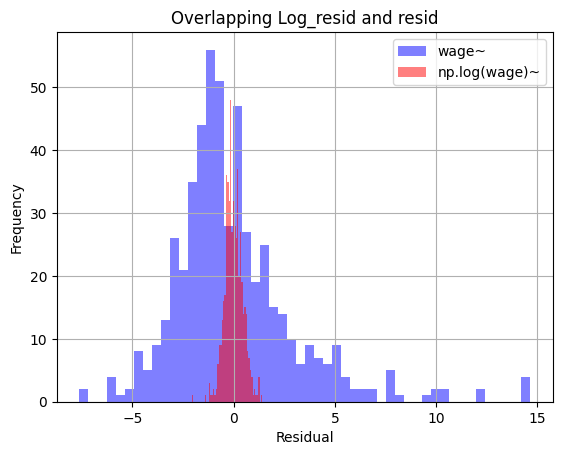

In [44]:
plt.hist(residual, bins=50, alpha=0.5, label='wage~', color='blue')
plt.hist(log_residuals, bins=50, alpha=0.5, label='np.log(wage)~', color='red')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Overlapping Log_resid and resid')
plt.legend()
plt.grid(True)
plt.show()

It's easy to see, that 'log-level' is closer to being satisfied for the 'level-level'.

## C4

Several statistics are commonly used to detect nonnormality in underlying population distributions. Here we will study one that measures the amount of skewness in a distribution. Recall that any normally distributed random variable is symmetric about its mean; therefore, if we standardize a symmetrically distributed random variable, say $z = (y - \mu_y)/\sigma_y$, where $\mu_y = E(y)$ and $\sigma_y = sd(y)$, then $z$ has mean zero, variance one, and $E(z^3) = 0$. Given a sample of data $\{y_i : i = 1, ..., n\}$, we can standardize $y_i$ in the sample by using $z_i = (y_i - \hat{\mu}_y)/\hat{\sigma}_y$, where $\hat{\mu}_y$ is the sample mean and $\hat{\sigma}_y$ is the sample standard deviation. (We ignore the fact that these are estimates based on the sample.) A sample statistic that measures skewness is $n^{-1} \sum\limits_{i=1}^{n} z_i^3 $, or where n is replaced with $(n-1)$ as a degrees-of-freedom adjustment. If y has a normal distribution in the population, the skewness measure in the sample for the standardized values should not differ significantly from zero.
   1. First use the [data](#data) set 401KSUBS.RAW, keeping only observations with $fsize = 1$. Find the skewness measure for inc. Do the same for log(inc). Which variable has more skewness and therefore seems less likely to be normally distributed?
   2. Next use BWGHT2.RAW. Find the [skewness](#skewness) measures for bwght and log(bwght). What do you conclude?
   3. [Evaluate](#Hist) the following statement: “The logarithmic transformation always makes a positive variable look more normally distributed.”
   4. If we are interested in the normality assumption in the context of regression, should we be evaluating the unconditional distributions of y and log(y)? Explain.

<p id="data"><b>4.A</b></p>

1. First use the data set 401KSUBS.RAW, keeping only observations with $fsize = 1$. Find the skewness measure for inc. Do the same for log(inc). Which variable has more skewness and therefore seems less likely to be normally distributed?

In [45]:
df = wooldridge.data('401ksubs')
df

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170000,0,0,40,1,4.575000,0,1,173.448898,1600
1,1,61.230000,0,1,35,1,154.000000,1,0,3749.112793,1225
2,0,12.858000,1,0,44,2,0.000000,0,0,165.328156,1936
3,0,98.879997,1,1,44,2,21.799999,0,0,9777.253906,1936
4,0,22.614000,0,0,53,1,18.450001,0,0,511.393005,2809
...,...,...,...,...,...,...,...,...,...,...,...
9270,0,58.428001,1,0,33,4,-1.200000,0,0,3413.831299,1089
9271,0,24.546000,0,1,37,3,2.000000,0,0,602.506104,1369
9272,0,38.549999,1,0,33,3,-13.600000,0,1,1486.102417,1089
9273,0,34.410000,1,0,57,3,3.550000,0,0,1184.048096,3249


In [74]:
wooldridge.data('401ksubs',description=True )

name of dataset: 401ksubs
no of variables: 11
no of observations: 9275

+----------+------------------------------+
| variable | label                        |
+----------+------------------------------+
| e401k    | =1 if eligble for 401(k)     |
| inc      | annual income, $1000s        |
| marr     | =1 if married                |
| male     | =1 if male respondent        |
| age      | in years                     |
| fsize    | family size                  |
| nettfa   | net total fin. assets, $1000 |
| p401k    | =1 if participate in 401(k)  |
| pira     | =1 if have IRA               |
| incsq    | inc^2                        |
| agesq    | age^2                        |
+----------+------------------------------+

A. Abadie (2003), “Semiparametric Instrumental Variable Estimation of
Treatment Response Models,” Journal of Econometrics 113, 231-263.
Professor Abadie kindly provided these data. He obtained them from the
1991 Survey of Income and Program Participation (SIPP).


In [47]:
df_fsize1 = df.loc[df['fsize']==1]
df_fsize1

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170000,0,0,40,1,4.575000,0,1,173.448898,1600
1,1,61.230000,0,1,35,1,154.000000,1,0,3749.112793,1225
4,0,22.614000,0,0,53,1,18.450001,0,0,511.393005,2809
9,1,29.100000,0,1,45,1,29.600000,0,1,846.809998,2025
15,0,19.073999,0,1,43,1,0.000000,0,0,363.817444,1849
...,...,...,...,...,...,...,...,...,...,...,...
9258,0,28.572001,0,1,28,1,-0.180000,0,0,816.359192,784
9259,1,57.282001,0,0,36,1,28.579000,1,0,3281.227783,1296
9260,0,73.458000,0,0,30,1,9.900000,0,0,5396.077637,900
9267,0,16.968000,0,0,49,1,69.199997,0,1,287.913025,2401


In [88]:
mean = np.mean(df_fsize1['inc'])
std_dev = np.std(df_fsize1['inc'])

# Apply the standardization formula
standardized_array = (df_fsize1['inc'] - mean) / std_dev


In [89]:
print(f"skewness is {sum(standardized_array)/len(standardized_array)}")

skewness is 2.3764937574710528e-17


In [90]:
mean = np.mean(np.log(df_fsize1['inc']), axis=0)
std_dev = np.std(np.log(df_fsize1['inc']), axis=0)

# Apply the standardization formula
standardized_array = (np.log(df_fsize1['inc']) - mean) / std_dev

In [91]:
print(f"skewness is {sum(pow(standardized_array,3))/len(standardized_array)}")

skewness is 0.3608714116940561


<p id="skewness"><b>4.B</b></p>

2. Next use BWGHT2.RAW. Find the skewness measures for bwght and log(bwght). What do you conclude?

In [71]:
bwght = wooldridge.data('bwght2')
bwght

,mage,meduc,monpre,npvis,fage,feduc,bwght,omaps,fmaps,cigs,...,male,mwhte,mblck,moth,fwhte,fblck,foth,lbwght,magesq,npvissq
0,26,12.0,2.0,12.0,34.0,16.0,3060,9.0,9.0,0.0,...,1,0,0,1,0,0,1,8.026170,676,144.0
1,29,12.0,2.0,12.0,32.0,12.0,3730,8.0,9.0,NaN,...,0,1,0,0,1,0,0,8.224163,841,144.0
2,33,12.0,1.0,12.0,36.0,16.0,2530,8.0,9.0,0.0,...,0,1,0,0,1,0,0,7.835975,1089,144.0
3,28,17.0,5.0,8.0,32.0,17.0,3289,8.0,9.0,0.0,...,1,1,0,0,1,0,0,8.098339,784,64.0
4,23,13.0,2.0,6.0,24.0,16.0,3590,6.0,8.0,0.0,...,1,1,0,0,1,0,0,8.185907,529,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,29,15.0,1.0,10.0,28.0,14.0,2080,9.0,9.0,0.0,...,1,1,0,0,1,0,0,7.640123,841,100.0
1828,31,14.0,1.0,6.0,30.0,12.0,1619,6.0,7.0,0.0,...,0,1,0,0,1,0,0,7.389564,961,36.0
1829,35,16.0,2.0,10.0,37.0,12.0,3100,8.0,9.0,0.0,...,1,1,0,0,1,0,0,8.039157,1225,100.0
1830,37,16.0,2.0,22.0,34.0,16.0,2580,9.0,9.0,0.0,...,0,1,0,0,1,0,0,7.855545,1369,484.0


In [75]:
wooldridge.data('bwght',description=True )

name of dataset: bwght
no of variables: 14
no of observations: 1388

+----------+--------------------------------+
| variable | label                          |
+----------+--------------------------------+
| faminc   | 1988 family income, $1000s     |
| cigtax   | cig. tax in home state, 1988   |
| cigprice | cig. price in home state, 1988 |
| bwght    | birth weight, ounces           |
| fatheduc | father's yrs of educ           |
| motheduc | mother's yrs of educ           |
| parity   | birth order of child           |
| male     | =1 if male child               |
| white    | =1 if white                    |
| cigs     | cigs smked per day while preg  |
| lbwght   | log of bwght                   |
| bwghtlbs | birth weight, pounds           |
| packs    | packs smked per day while preg |
| lfaminc  | log(faminc)                    |
+----------+--------------------------------+

J. Mullahy (1997), “Instrumental-Variable Estimation of Count Data
Models: Applications to Models of C

In [83]:
bwght['bwght']

0       3060
1       3730
2       2530
3       3289
4       3590
        ... 
1827    2080
1828    1619
1829    3100
1830    2580
1831    2100
Name: bwght, Length: 1832, dtype: int64

In [80]:
# mean evaluation
bwght['bwght'].mean()

3401.122270742358

In [79]:
# standart error evaluation
bwght['bwght'].std()

576.544431498326

In [81]:
standart_bwght = (bwght['bwght'] - bwght['bwght'].mean())/bwght['bwght'].std()

In [82]:
standart_bwght

0      -0.591667
1       0.570429
2      -1.510937
3      -0.194473
4       0.327603
          ...   
1827   -2.291449
1828   -3.091041
1829   -0.522288
1830   -1.424213
1831   -2.256760
Name: bwght, Length: 1832, dtype: float64

In [94]:
skewness_bwght = sum(pow(standart_bwght,3))/len(standart_bwght)
skewness_bwght

-0.6001562946265322

In [95]:
log_standart_bwght = (np.log(bwght['bwght']) - np.log(bwght['bwght']).mean())/np.log(bwght['bwght']).std()
log_standart_bwght

0      -0.433497
1       0.540992
2      -1.369606
3      -0.078295
4       0.352702
          ...   
1827   -2.333553
1828   -3.566762
1829   -0.369576
1830   -1.273286
1831   -2.286454
Name: bwght, Length: 1832, dtype: float64

<p id="#Hist"><b>4.C</b></p>

3. Evaluate the following statement: “The logarithmic transformation always makes a positive variable look more normally distributed.”

In [102]:
log_skewness_bwght = sum(pow(log_standart_bwght,3))/len(log_standart_bwght)
log_skewness_bwght

-2.9486162498085173

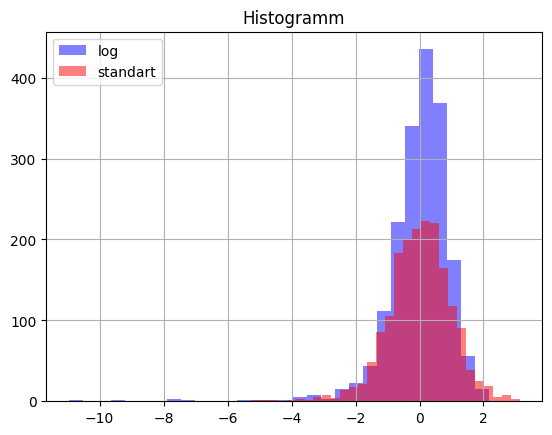

In [103]:
plt.hist(log_standart_bwght, bins = 30, alpha = 0.5, label='log', color = 'blue' )
plt.hist(standart_bwght,bins = 30, alpha = 0.5, label = 'standart', color = 'red')
plt.title('Histogramm')
plt.legend()
plt.grid(True)
plt.show()